In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model #also known as scikit 


In [ ]:
#########################################################
# Linear Regression - Single Variable
#########################################################

In [20]:
TRAIN_df = pd.read_csv("homeprices.csv")  #"train" dataset
TRAIN_df


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


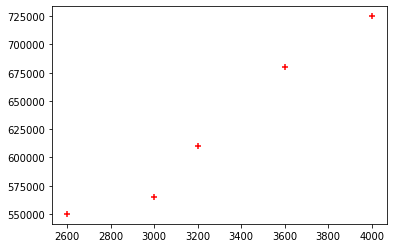

In [12]:
plt.xlabel='area'
plt.ylabel='price'
plt.scatter(TRAIN_df.area,TRAIN_df.price, color='red', marker='+')


In [21]:
reg = linear_model.LinearRegression()
reg.fit(TRAIN_df[['area']],TRAIN_df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
reg.predict([[5000]]) 

array([859554.79452055])

In [16]:
reg.coef_

array([135.78767123])

In [17]:
reg.intercept_

180616.43835616432

In [33]:
########### Save trained Model
import pickle 

# Save model 'reg' to a file named 'model_joblib'
from sklearn.externals import joblib
joblib.dump(reg, 'model_joblib2')

['model_joblib2']

In [35]:
####### Load model from file (and call the model "mp")
mj = joblib.load('model_joblib2')



In [59]:
TEST_df = pd.read_csv("areas.csv")

In [60]:
result_df = reg.predict(TEST_df)

In [61]:
TEST_df['prices'] = result_df

In [62]:
TEST_df.to_csv("prediction_single.csv", index=False)

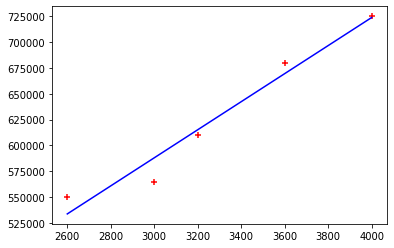

In [63]:
%matplotlib inline
plt.xlabel='area'
plt.ylabel='price'
plt.scatter(TRAIN_df.area,TRAIN_df.price, color='red', marker='+')
plt.plot(TRAIN_df.area, reg.predict(TRAIN_df[['area']]), color='blue')

In [ ]:
#########################################################
# Linear Regression - Multi Variable
#########################################################

In [64]:

TRAIN_df=pd.read_csv("homeprices_multi.csv")
TRAIN_df

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,3,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


In [65]:
import math
median_bedrooms = math.floor(TRAIN_df.bedrooms.median())

TRAIN_df.bedrooms = TRAIN_df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [68]:
reg = linear_model.LinearRegression()
reg.fit(TRAIN_df[['area','bedrooms','age']],TRAIN_df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
reg.coef_


array([  112.06244194, 23388.88007794, -3231.71790863])

In [67]:
result = reg.predict([[3000,5,40]])
result

array([512693.05019305])

In [69]:
TEST_df = pd.read_csv("multivariate_input.csv")
# create new array of output prices (!!input needs to be aligned, same order of columns!!)
result_df = reg.predict(TEST_df)
# bring in this result column into the original dataframe
TEST_df['prices'] = result_df
# output file
TEST_df.to_csv("prediction_multi.csv", index=False)

In [71]:
reg.score(TRAIN_df[['area','bedrooms','age']],TRAIN_df.price)

0.9534350855214516

In [ ]:
#########################################################
# Gradient Descent - Single Variable
#########################################################

In [125]:
import numpy as np
import matplotlib.pyplot as plt

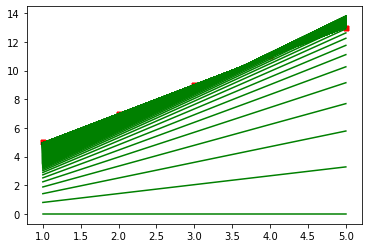

In [126]:
%matplotlib inline
def gradient_descent(x,y):
    m_curr = b_curr = 0
    rate = 0.01
    n = float(len(x))
    plt.scatter(x,y,color='red',marker='+',linewidth='5')
    for i in range(1000):   # adjust this to 10000 (if CPU can handle this)
        y_predicted = m_curr * x + b_curr
        plt.plot(x,y_predicted,color='green')
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd
        
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)
# the red points are the y values from the training dataset
# the green lines should converge with the expected 'm' (2 slope) and 'b' (3 y-intercept) values

In [144]:
# Now that you have your 'm' and 'b', use it to solve for your TEST dataset
# Need to iterate over an array
# m = 2
# b = 3


# x_test  (create sample, or import)
x_test = {
	'x' : [1,2,3,4,5,6,7,8,9,10],
}
x_test = pd.DataFrame(x_test)

# function of y=mx+b
def res_func(x):
	y = 2*x +3
	return y

result_df = res_func(x_test)
x_test['result'] = result_df

x_test
    


,x,result
0,1,5
1,2,7
2,3,9
3,4,11
4,5,13
5,6,15
6,7,17
7,8,19
8,9,21
9,10,23


In [133]:
#########################################################
# Gradient Descent Multivariate
#########################################################

In [243]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [193]:
'''
# import train set (use 3 total variables so you can plot a 3D graph)
test_array=np.loadtxt(open("homeprices_multi.csv"), delimiter=",", skiprows=1)
test_array

X_train = test_array[:,[0,1]] #feature set
y_train = test_array[:,2] #label set
'''

'\n# import train set (use 3 total variables so you can plot a 3D graph)\ninput_df=pd.read_csv("homeprices_multi.csv")\ninput_df\n\nTRAIN_DF = input_df[[\'area\',\'bedrooms\',\'price\']]\n# this is a "feature matrix"\nTRAIN_DF\n'

In [244]:

# hypothesis(): It is the function that calculates and outputs the hypothesis value of the Target Variable 
# Given theta, dimensions/features in a matrix, X of dimension  [m X (n+1)] where m is the number of samples and n is the number of features

def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h


# BGD(): It is the function that performs the Batch Gradient Descent Algorithm taking current value of theta , 
# learning rate (alpha), number of iterations (num_iters), list of hypothesis values of all samples (h), feature set (X), 
# Target Variable set (y) and Number of Features (n) as input and outputs the optimized theta

def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

# linear_regression(): It is the principal function that takes the features matrix (X), 
# Target Variable Vector (y), learning rate (alpha) and number of iterations (num_iters) as input 
# and outputs the final optimized theta

def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

# sample tutorial dataset (replace)
# (??) why this format (??) 
data = np.loadtxt('Gradient_Descent_3D.txt', delimiter=',')
X_train = data[:,[0,1]] #feature set
y_train = data[:,2] #label set


In [166]:
y_train

array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

In [245]:
# Normalization
# This involves scaling the features for fast and efficient computation.
# x = (x - u) /sigma  ---- where u is the Mean and sigma is the Standard Deviation:

mean = np.ones(X_train.shape[1])
std = np.ones(X_train.shape[1])
for i in range(0, X_train.shape[1]):
    mean[i] = np.mean(X_train.transpose()[i])
    std[i] = np.std(X_train.transpose()[i])
    for j in range(0, X_train.shape[0]):
        X_train[j][i] = (X_train[j][i] - mean[i])/std[i]
        


In [257]:
# calling the principal function with learning_rate = 0.0001 and 
# num_iters = 300000
theta, cost = linear_regression(X_train, y_train,
                                               0.0001, 50000)

In [258]:
theta

array([[ 3.38119551e+05,  1.03000064e+05, -1.72753169e+02]])

Text(0, 0.5, 'Cost')

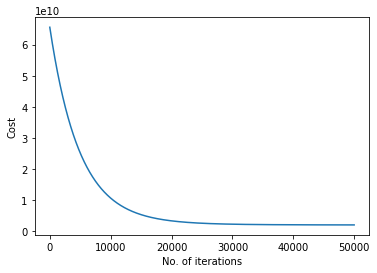

In [259]:

# graph representation of reduction of cost by # of iterations:

import matplotlib.pyplot as plt
cost = list(cost)
n_iterations = [x for x in range(1,50001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

Text(0.5, 0, 'Actual Housing Price')

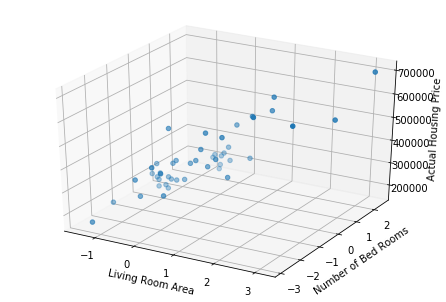

In [260]:
# =>Actual Target Variable Visualization:

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
sequence_containing_x_vals = list(X_train.transpose()[0])
sequence_containing_y_vals = list(X_train.transpose()[1])
sequence_containing_z_vals = list(y_train)
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,
           sequence_containing_z_vals)
ax.set_xlabel('Living Room Area', fontsize=10)
ax.set_ylabel('Number of Bed Rooms', fontsize=10)
ax.set_zlabel('Actual Housing Price', fontsize=10)

Text(0.5, 0, 'Housing Price Predictions')

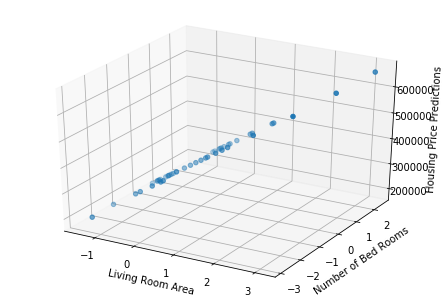

In [261]:
# =>Prediction Target Variable Visualization:

# Getting the predictions...
X_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train)
                         ,axis = 1)
predictions = hypothesis(theta, X_train, X_train.shape[1] - 1)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
sequence_containing_x_vals = list(X_train.transpose()[1])
sequence_containing_y_vals = list(X_train.transpose()[2])
sequence_containing_z_vals = list(predictions)
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,
           sequence_containing_z_vals)
ax.set_xlabel('Living Room Area', fontsize=10)
ax.set_ylabel('Number of Bed Rooms', fontsize=10)
ax.set_zlabel('Housing Price Predictions', fontsize=10)
